# Import important libraries 

In [1]:
# data analysis and wrangling

import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # Linear Algebra
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


# Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.


In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [3]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [5]:
gender_submission_data = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')


print("\n\n ******************* Analyze by describing train data  ******************* \n\n ")

print("\n\n ******************* TOP 5 RECORDS ******************* \n\n ")
print(train_df.head(5))

print("\n\n ******************* BOTTOM 5 RECORDS ******************* \n\n ")
print(train_df.tail(5))

print("\n\n ******************* DESCRIBE ******************* \n\n ")
print(train_df.describe())

print("\n\n ******************* INFORMATION ******************* \n\n ")
print(train_df.info())

print("\n\n ******************* MISSING VALUES ******************* \n\n ")
print(train_df.isnull().sum())

print("\n\n ******************* NULL VALUES ******************* \n\n ")
print(train_df.isna().sum())

print("\n\n ******************* SHAPE ******************* \n\n ")
print(train_df.shape)

print("\n\n ******************* COLUMNS******************* \n\n ")
print(train_df.columns)

print("\n\n ******************* DATA TYPES ******************* \n\n ")
print(train_df.dtypes)

=================================================================

print("\n\n ******************* OVERVIEW OF TEST DATAFRAME ******************* \n\n ")

print("\n\n ******************* TOP 5 RECORDS ******************* \n\n ")
print(test_df.head(5))

print("\n\n ******************* BOTTOM 5 RECORDS ******************* \n\n ")
print(test_df.tail(5))

print("\n\n ******************* INFORMATION ******************* \n\n ")
print(test_df.info())

print("\n\n ******************* DESCRIBE ******************* \n\n ")
print(test_df.describe())

print("\n\n ******************* MISSING VALUES ******************* \n\n ")
print(test_df.isnull().sum())

print("\n\n ******************* NULL VALUES ******************* \n\n ")
print(test_df.isna().sum())

print("\n\n ******************* SHAPE ******************* \n\n ")
print(test_df.shape)

print("\n\n ******************* COLUMNS******************* \n\n ")
print(test_df.columns)

print("\n\n ******************* DATA TYPES ******************* \n\n ")
print(test_df.dtypes)





# Analyse the data

So, do you know, how the dataset looks like? Which features are available in the dataset?

'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Knowing the column names only is not enough. Are you curious to know more about it? If yes, lets move ahead.


In [7]:
print('_'*40)
train_df.info()
print('_'*40)
test_df.info()

________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 n

**info() **- provides the detailed information about dataframe. 

For instance,
RangeIndex: represents total number of entries/records in the dataset (eg: 891 entries, 0 to 890)
Total number of columns and their datatypes (individually for each feature and for the whole parameters in the dataset).

Data columns (total 12 columns):

PassengerId    891 non-null int64

dtypes: float64(2), int64(5), object(5)

**Notice the difference between two datasets:** 

Train data has total 12 data columns. However, the test data has only 11 data columns. One column **(Survived)** is missing in the test dataset. So, this is our task - to find out the values of survived parameter in the test data. We will train the machine with the train dataset, so that machine can learn from the train dataset and learns to find out the value of desired parameter.


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. Which features are numerical?

These values change from sample to sample.

**describe() :** this function can help you to find out the numerical features or columns. As this function provides the more details about the numerical features present in the dataset. It provides the count, mean, standard deviation, minimum, maximum value and various percentages of the values present in the dataset. 

**Notice**, this function includes both the **integer datatype columns as well as float datatypes.**

PassengerId    891 non-null int64

Survived       891 non-null int64

Pclass         891 non-null int64

Age            714 non-null float64

SibSp          891 non-null int64

Parch          891 non-null int64

Fare           891 non-null float64


Within numerical features, values can be discrete, continuous, or timeseries based? 

Discrete Data: Discrete Data can only take certain values. Example: the number of students in a class. We can't have half a student! eg: 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 and 12

Continuous Data: Continuous Data can take any value (within a range). Example : A person's height could be any value (within the range of human heights), not just certain fixed heights. eg: 60.3, 60.9,70,45.34, 95.098

    Discrete: PassengerId , Survived, Pclass, SibSp, Parch.
    Continous: Age, Fare. 

For more information: https://learn.g2.com/discrete-vs-continuous-data

2. Which features are categorical?

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? 

Categorical Data: A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.  For example, gender is a categorical variable having two categories (male and female) and there is no intrinsic ordering to the categories. 

Ordinal Data: An ordinal variable is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the variables.  For example, suppose you have a variable, economic status, with three categories (low, medium and high).  In addition to being able to classify people into these three categories, you can order the categories as low, medium and high. 

Sex            891 non-null object

Embarked       889 non-null object

Survived       891 non-null int64

Pclass         891 non-null int64


    Categorical: Survived, Sex, and Embarked. 
    
    Ordinal: Pclass.
    
Notice the datatype. Although the type of Survived and pClass shown in the described() is integer.Try to relate it with the categorical and ordinal data. Sex can be best classified under the categorical feature. Either male/female or m/f or 0/1. Each of the value has equal importance and no intrinsic ordering to the categories. In the case of Pclass, it has three different values, 1 = 1st, 2 = 2nd, 3 = 3rd . Each represent the sort of economic status, with three categories.


3. Which features are mixed data types?

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

    Ticket is a mix of numeric and alphanumeric data types.
    
    Cabin is alphanumeric.

4. Which features may contain errors or typos?

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

    Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.
  

> Undersatnding the type of data is very necessary, as this helps us select the appropriate plots for visualization.
> 

Discrete Data: Scatter plot
Continous Data: Line graph


# Finding missing entries in the train data 

Out of 891 entries in the train data, following columns have missing data

Age            714 non-null float64 (891 - 714 = 177 missing entries)

Cabin          204 non-null object (891 - 204 = 687 missing entries)

Embarked       889 non-null object (891 - 889 = 2 missing entries)

To get the missing entries in a more interactive way , find those entries having "Embarked" value null.
> train_df[train_df['Embarked'].isnull()]

In [9]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [11]:
train_df[train_df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


 # Handling the Missing Entries in the train data


**Handling embarked data**

Amelie and Martha Boarded in Southampton according to encyclopedia-titanica.org "Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28"

So, Fill the NaN values with a given number with which you want to substitute. In this case, S - for Southampton.
You have two options to do that

1. According to the index of rows of dataframe
2. According to the name of the column in the form of a python dictionary ( We are following this way)

In [12]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

Handling Age data

In [14]:
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


As there are 177 entries for which Age is missing. How we can predict the age of 177 people? We cannot do google or find another sources to figure out the values of the individuals and fill it our database. Here we have a small dataset. Imagine, if we have a dataset having millions of records. So, lets try another way to fill the missing values of age.


In [15]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
for name in train_df['Name']:
    train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.',expand=True)

In [17]:
pd.unique(train_df['Title'])

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [18]:
groupByTitle = train_df.groupby('Title').mean()

groupByTitle.head(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,,
Capt,746.000000,0.000000,1.000000,70.000000,1.000000,1.000000,71.000000
Col,671.500000,0.500000,1.000000,58.000000,0.000000,0.000000,31.025000
Countess,760.000000,1.000000,1.000000,33.000000,0.000000,0.000000,86.500000
Don,31.000000,0.000000,1.000000,40.000000,0.000000,0.000000,27.720800
Dr,545.857143,0.428571,1.285714,42.000000,0.571429,0.000000,49.168457
Jonkheer,823.000000,0.000000,1.000000,38.000000,0.000000,0.000000,0.000000
Lady,557.000000,1.000000,1.000000,48.000000,1.000000,0.000000,39.600000
Major,493.500000,0.500000,1.000000,48.500000,0.000000,0.000000,28.525000
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125


In [19]:
train_df[train_df['Age'].isnull()].groupby('Title', as_index=False).count()

,Title,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,Dr,1,1,1,1,1,0,1,1,1,1,0,1
1,Master,4,4,4,4,4,0,4,4,4,4,0,4
2,Miss,36,36,36,36,36,0,36,36,36,36,2,36
3,Mr,119,119,119,119,119,0,119,119,119,119,12,119
4,Mrs,17,17,17,17,17,0,17,17,17,17,5,17


In [20]:
#groupByTitle['Age']['Dr']

titlesWithMissingAge = ['Dr','Master','Miss','Mr','Mrs']

for title in titlesWithMissingAge:
    train_df.loc[train_df.Age.isnull() & (train_df.Title == title),'Age'] = groupByTitle['Age'][title]


In [21]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

Handling Missing Cabin Data

I dont think the cabin will impact the model as such, since we can use fare and Pclass . To delete or not to delete ?

# Finding missing entries in test data

Similarly, find the missing data in the test data. 

In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB



Age            332 non-null float64

Fare           417 non-null float64

Cabin          91 non-null object

In the test data, Age, Fare, Cabin has missing data.



handling age


In [23]:
for name in test_df['Name']:
    test_df['Title'] = test_df['Name'].str.extract('([A-Za-z]+)\.',expand=True)

In [24]:
pd.unique(test_df['Title'])

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [25]:
groupByTestTitle = test_df.groupby('Title').mean()

groupByTestTitle

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,
Col,1058.500000,1.000000,50.000000,0.500000,0.000000,128.012500
Dona,1306.000000,1.000000,39.000000,0.000000,0.000000,108.900000
Dr,1185.000000,1.000000,53.000000,1.000000,1.000000,81.858300
Master,1123.380952,2.714286,7.406471,1.571429,1.380952,38.494043
Miss,1101.782051,2.435897,21.774844,0.551282,0.397436,40.087876
Mr,1101.279167,2.320833,32.000000,0.270833,0.175000,25.563302
Mrs,1090.097222,1.833333,38.903226,0.597222,0.833333,59.974249
Ms,980.000000,3.000000,NaN,0.000000,0.000000,7.750000
Rev,1048.500000,2.000000,35.500000,0.500000,0.500000,19.500000


In [26]:
test_df[test_df['Age'].isnull()].groupby('Title', as_index=False).count()

,Title,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,Master,4,4,4,4,0,4,4,4,4,0,4
1,Miss,14,14,14,14,0,14,14,14,14,0,14
2,Mr,57,57,57,57,0,57,57,57,57,4,57
3,Mrs,10,10,10,10,0,10,10,10,10,0,10
4,Ms,1,1,1,1,0,1,1,1,1,0,1


4+14+57+10+1 = 86

In [27]:
title = ['Ms','Master','Miss','Mr','Mrs']

for title in test_df['Title']:
    test_df.loc[(test_df.Age.isnull()) & (test_df['Title'] == title),'Age'] = groupByTestTitle['Age'][title]
    
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

Still there is 1 record, for which age is null.



In [28]:
test_df[test_df['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Ms


In [29]:
test_df.loc[test_df['Title']=='Ms']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Ms


O'Donoghue, Ms. Bridget's Age wasnt populated because we do not have a mean Value for the Ms tittle

On googling i found out that she was 21 years old


In [30]:
test_df['Age'] = test_df['Age'].fillna(21)


In [31]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

handling missing fare values



In [32]:
test_df[test_df.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [33]:
test_df.groupby('Pclass')['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [34]:
test_df['Fare'] = test_df['Fare'].fillna(12.4596)

In [35]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

# Visualization

plot a bar graph to check how many people died ot survived according to gender

In [36]:
women = train_df.loc[train_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print('% of women who survived = ', rate_women)

% of women who survived =  0.7420382165605095


In [37]:
men = train_df.loc[train_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print('% of men who survived = ', rate_men)

% of men who survived =  0.18890814558058924


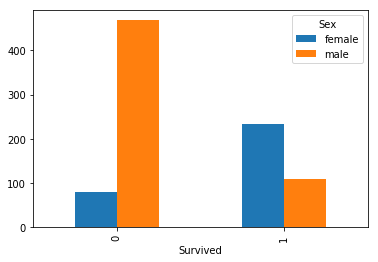

In [38]:
train_df.groupby(['Sex', 'Survived'] )['Survived'].count().unstack('Sex').plot(kind='bar')

# Handling Categorical Data

Convert the categorical Gender values to integers

In [39]:
train_df['Sex'] = train_df.Sex.apply(lambda x: 0 if x == "female" else 1)
test_df['Sex'] = test_df.Sex.apply(lambda x: 0 if x == "female" else 1)


Dropping the unnecessary fields: As discussed above that cabin is not an impotan feature to know . It is not going to affect the survival of any passenger. So, we are going to delete this column from train and test data.


In [40]:
train_df.drop('Cabin', axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.773973,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C,Mr


In [41]:
test_df.drop ('Cabin', axis=1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,32.000000,0,0,A.5. 3236,8.0500,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
416,1308,3,"Ware, Mr. Frederick",1,32.000000,0,0,359309,8.0500,S,Mr


conveting the Embarking points to integers

In [42]:
Emb_Keys={'C':1,'Q':2,'S':3}

train_df = train_df.replace({'Embarked':Emb_Keys})

test_df = test_df.replace({'Embarked':Emb_Keys})

Converting Titles into integers

In [43]:
Keys = {'Capt': 1, 'Col': 1, 'Don':1, 'Dr':1, 'Jonkh eer':1, 'Major':1, 'Rev': 1, 'Sir':1,'Mr':1, 'Countess': 2, 'Dona':2, 'Lady':2,'Mme':2, 'Mrs':2, 'Ms': 3, 'Mlle':3, 'Miss':3,'Master':4}

# Remap the values of the dataframe 
train_df = train_df.replace({'Title':Keys})
test_df = test_df.replace({'Title':Keys})



# Feature Generation = Adding new features 

1. Adding new feature "Is_child"

In [44]:
for age in train_df['Age']:
    
    train_df.loc[(train_df['Age'] < 18),'Is_child'] = 1
    train_df.loc[(train_df['Age'] >= 18),'Is_child'] = 0

train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Is_child
487,488,0,1,"Kent, Mr. Edward Austin",1,58.0,0,0,11771,29.7000,B37,1,1,0.0
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",0,39.0,1,1,110413,79.6500,E67,3,2,0.0
269,270,1,1,"Bissette, Miss. Amelia",0,35.0,0,0,PC 17760,135.6333,C99,3,3,0.0
238,239,0,2,"Pengelly, Mr. Frederick William",1,19.0,0,0,28665,10.5000,NaN,3,1,0.0
492,493,0,1,"Molson, Mr. Harry Markland",1,55.0,0,0,113787,30.5000,C30,3,1,0.0


In [45]:
for age in test_df['Age']:
    
    test_df.loc[(test_df['Age'] < 18),'Is_child'] = 1
    test_df.loc[(test_df['Age'] >= 18),'Is_child'] = 0

test_df.loc[test_df['Is_child'] == 1].sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Is_child
344,1236,3,"van Billiard, Master. James William",1,7.406471,1,1,A/5. 851,14.5000,NaN,3,4,1.0
269,1161,3,"Pokrnic, Mr. Mate",1,17.000000,0,0,315095,8.6625,NaN,3,1,1.0
296,1188,2,"Laroche, Miss. Louise",0,1.000000,1,2,SC/Paris 2123,41.5792,NaN,1,3,1.0
192,1084,3,"van Billiard, Master. Walter John",1,11.500000,1,1,A/5. 851,14.5000,NaN,3,4,1.0
339,1231,3,"Betros, Master. Seman",1,7.406471,0,0,2622,7.2292,NaN,1,4,1.0


2. Adding new feature "Is_alone"

In [46]:
train_df['Is_Alone'] = train_df['SibSp'] + train_df['Parch']
train_df['Is_Alone'] = train_df.Is_Alone.apply(lambda x:1 if x == 0 else 0)

test_df['Is_Alone'] = test_df['SibSp'] + test_df['Parch']
test_df['Is_Alone'] = test_df.Is_Alone.apply(lambda x:1 if x == 0 else 0)

3. Adding new feature "Family_size"

In [47]:
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_size'] = test_df['SibSp'] + test_df['Parch'] + 1

 4. Adding new feature "Individual_fare"

In [48]:
train_df['Individual_fare'] = train_df['Fare'] / train_df['Family_size']
test_df['Individual_fare'] = test_df['Fare'] / test_df['Family_size'] 

new dataset

In [49]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Is_child,Is_Alone,Family_size,Individual_fare
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",1,42.00000,0,0,348121,7.6500,F G63,3,1,0.0,1,1,7.6500
294,295,0,3,"Mineff, Mr. Ivan",1,24.00000,0,0,349233,7.8958,NaN,3,1,0.0,1,1,7.8958
221,222,0,2,"Bracken, Mr. James H",1,27.00000,0,0,220367,13.0000,NaN,3,1,0.0,1,1,13.0000
327,328,1,2,"Ball, Mrs. (Ada E Hall)",0,36.00000,0,0,28551,13.0000,D,3,2,0.0,1,1,13.0000
185,186,0,1,"Rood, Mr. Hugh Roscoe",1,32.36809,0,0,113767,50.0000,A32,3,1,0.0,1,1,50.0000


In [50]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Is_child,Is_Alone,Family_size,Individual_fare
59,951,1,"Chaudanson, Miss. Victorine",0,36.000000,0,0,PC 17608,262.3750,B61,1,3,0.0,1,1,262.3750
37,929,3,"Cacic, Miss. Manda",0,21.000000,0,0,315087,8.6625,NaN,3,3,0.0,1,1,8.6625
232,1124,3,"Wiklund, Mr. Karl Johan",1,21.000000,1,0,3101266,6.4958,NaN,3,1,0.0,0,2,3.2479
83,975,3,"Demetri, Mr. Marinko",1,32.000000,0,0,349238,7.8958,NaN,3,1,0.0,1,1,7.8958
273,1165,3,"Lennon, Miss. Mary",0,21.774844,1,0,370371,15.5000,NaN,2,3,0.0,0,2,7.7500


# Finding the corelation of features

Correlation Matrix To determine which variables affect the survival rate


Text(0.5, 1.0, 'Feature Correlations')

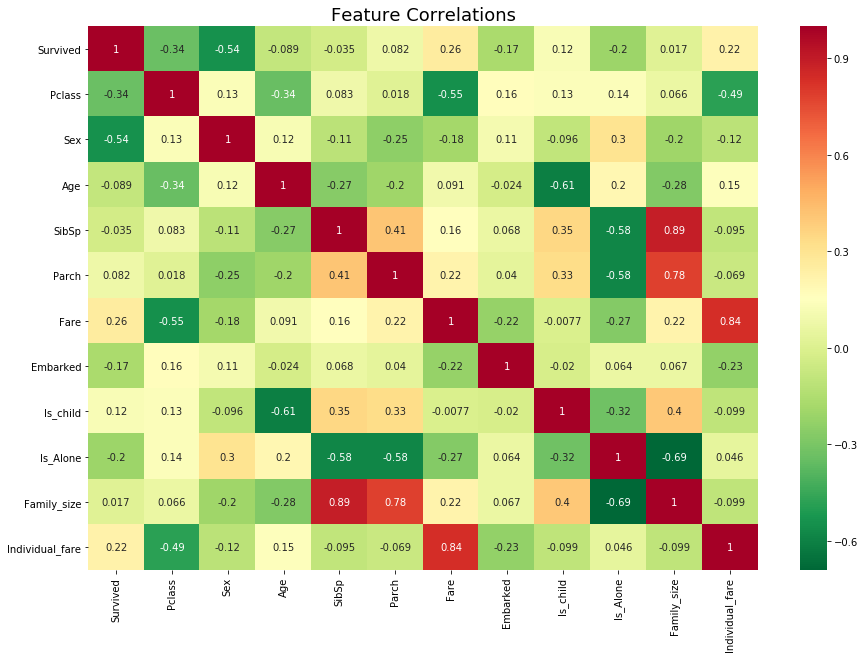

In [51]:
plt.subplots(figsize = (15,10))
sns.heatmap(train_df.drop(columns='PassengerId').corr(), annot=True,cmap="RdYlGn_r")
plt.title("Feature Correlations", fontsize = 18)

# Handling missing data by combining train data and test data

As we need to perform some operations on the train data and test data to handle the missing values/entries. So, instead of performing all those operations separately on the train data and test data, a better way to handle the missing data is, to combine the train data and test data.Perform the operations.At last, split the data again to train data and test data.

combine_df = [train_df, test_df]
Note: train data has 12 column
Test data has 11 column.
Before combining we need to take care of it.



In [52]:
from sklearn.ensemble import RandomForestClassifier

y = train_df["Survived"]

#Select features
features = ["Pclass", "Sex", "SibSp", "Parch", "Fare", "Is_child", "Is_Alone"]

X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=7)
model.fit(X, y)
predictions = model.predict(X_test)


output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [53]:
output.groupby('Survived').count()

,PassengerId
Survived,
0,270
1,148


In [54]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [55]:
test_df.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Is_child,Is_Alone,Family_size,Individual_fare
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2,1,0.0,1,1,7.829200
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,3,2,0.0,0,2,3.500000
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2,1,0.0,1,1,9.687500
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,3,1,0.0,1,1,8.662500
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,3,2,0.0,0,3,4.095833
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,3,1,1.0,1,1,9.225000
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,2,3,0.0,1,1,7.629200
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,3,1,0.0,0,3,9.666667
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,1,2,0.0,1,1,7.229200
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,3,1,0.0,0,3,8.050000
